In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:


# List of file paths
file_paths = [
    r'C:\Users\akish\Downloads\appearances.xlsx',
    r'C:\Users\akish\Downloads\game_events.xlsx',
    r'C:\Users\akish\Downloads\game_lineups.xlsx',
    r'C:\Users\akish\Downloads\games.xlsx',
    r'C:\Users\akish\Downloads\players.xlsx'
]

# Empty list to hold DataFrames
data_frames = []

# Attempt to read each Excel file into a separate DataFrame
for file_path in file_paths:
    try:
        data_frames.append(pd.read_excel(file_path))
        print(f"File '{file_path}' successfully read.")
    except Exception as e:
        print(f"Error reading file '{file_path}': {e}")

# Check if any DataFrames were successfully loaded
if data_frames:
    # Concatenate the DataFrames
    merged_df = pd.concat(data_frames, ignore_index=True)
    
    # Write the merged DataFrame to a new Excel file
    try:
        merged_df.to_excel('merged_file.xlsx', index=False)
        print("Merged DataFrame successfully saved to 'merged_file.xlsx'.")
    except Exception as e:
        print(f"Error saving merged DataFrame: {e}")
else:
    print("No DataFrames were successfully loaded. Check the file paths and try again.")



File 'C:\Users\akish\Downloads\appearances.xlsx' successfully read.
File 'C:\Users\akish\Downloads\game_events.xlsx' successfully read.
File 'C:\Users\akish\Downloads\game_lineups.xlsx' successfully read.
File 'C:\Users\akish\Downloads\games.xlsx' successfully read.
File 'C:\Users\akish\Downloads\players.xlsx' successfully read.
Merged DataFrame successfully saved to 'merged_file.xlsx'.


In [3]:
merged_df

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,player_code,country_of_birth,date_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2224728_119169,2224728.0,119169.0,2012-07-13,Aron Johannsson,DK1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN
1,2224732_161244,2224732.0,161244.0,2012-07-14,Conor O'Brien,DK1,0.0,0.0,1.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN
2,2224729_39467,2224729.0,39467.0,2012-07-15,Clarence Goodson,DK1,0.0,0.0,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN
3,2232104_119169,2232104.0,119169.0,2012-07-19,Aron Johannsson,ELQ,0.0,0.0,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,2219794_39475,2219794.0,39475.0,2012-07-22,Sacha Kljestan,BESC,0.0,0.0,0.0,0.0,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,NaN,NaN,273570.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,desevio-payne,United States,1995-11-30,Right-Back,right,182.0,NaN,400000.0,NaT,NaN
9052,NaN,NaN,111783.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,alejandro-bedoya,United States,1987-04-29,Central Midfield,right,182.0,300000.0,2500000.0,2023-12-31,YMU Group
9053,NaN,NaN,160670.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,joe-gyau,United States,1992-09-16,Left Winger,both,175.0,400000.0,600000.0,2023-12-31,BR Group Management
9054,NaN,NaN,3476.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,brad-friedel,United States,1971-05-18,Goalkeeper,NaN,NaN,NaN,4000000.0,NaT,NaN


Remove Redundant columns

In [4]:
# Remove redundant columns (if any)
# You need to manually specify which columns you want to keep
merged_df = merged_df.loc[:,~merged_df.columns.duplicated()]


In [5]:
# Check null values
null_counts = merged_df.isnull().sum()
print("Null value counts:\n", null_counts)

# Perform null value treatment
# Fill missing values with the average of each column
for column in merged_df.columns:
    if merged_df[column].dtype in ['int64', 'float64']:
        mean_value = merged_df[column].mean()
        merged_df[column].fillna(mean_value, inplace=True)

# Save the cleaned DataFrame as CSV
cleaned_file_path = 'Football_data_merged_cleaned.csv'
merged_df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to '{cleaned_file_path}'.")


Null value counts:
 appearance_id                  5488
game_id                         152
player_id                      3268
date                            371
player_name                    5269
competition_id                 2220
yellow_cards                   5488
red_cards                      5488
goals                          5488
assists                        5488
minutes_played                 5488
game_event_id                  7207
minute                         7207
type                           6988
description                    8140
player_in_id                   7901
player_assist_id               8916
game_lineups_id                8837
number                         8837
team_captain                   8837
position                       8685
season                         5788
round                          5788
home_club_goals                5788
away_club_goals                5788
home_club_position             6267
away_club_position             6267
home_clu

In [6]:
# Save the cleaned DataFrame as CSV
cleaned_file_path = 'Football_data_merged_cleaned.csv'
merged_df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to '{cleaned_file_path}'.")


Cleaned data saved to 'Football_data_merged_cleaned.csv'.


In [7]:
# Function to generate column descriptions based on data types
def generate_description(data_type):
    if data_type == 'int64':
        return 'Integer data type'
    elif data_type == 'float64':
        return 'Floating-point data type'
    elif data_type == 'object':
        return 'String data type'
    else:
        return 'Unknown data type'

# Create data dictionary
data_dictionary = {}
for column in merged_df.columns:
    data_type = str(merged_df[column].dtype)
    description = generate_description(data_type)
    data_dictionary[column] = description

# Print data dictionary
for column, description in data_dictionary.items():
    print(f"{column}: {description}")

# Save data dictionary to a text file
dictionary_file_path = 'Data_Dictionary.txt'
with open(dictionary_file_path, 'w') as f:
    for column, description in data_dictionary.items():
        f.write(f"{column}: {description}\n")
print(f"Data dictionary saved to '{dictionary_file_path}'.")


appearance_id: String data type
game_id: Floating-point data type
player_id: Floating-point data type
date: Unknown data type
player_name: String data type
competition_id: String data type
yellow_cards: Floating-point data type
red_cards: Floating-point data type
goals: Floating-point data type
assists: Floating-point data type
minutes_played: Floating-point data type
game_event_id: String data type
minute: Floating-point data type
type: String data type
description: String data type
player_in_id: Floating-point data type
player_assist_id: Floating-point data type
game_lineups_id: String data type
number: Floating-point data type
team_captain: Floating-point data type
position: String data type
season: Floating-point data type
round: String data type
home_club_goals: Floating-point data type
away_club_goals: Floating-point data type
home_club_position: Floating-point data type
away_club_position: Floating-point data type
home_club_manager_name: String data type
away_club_manager_name: 

Substution analysis

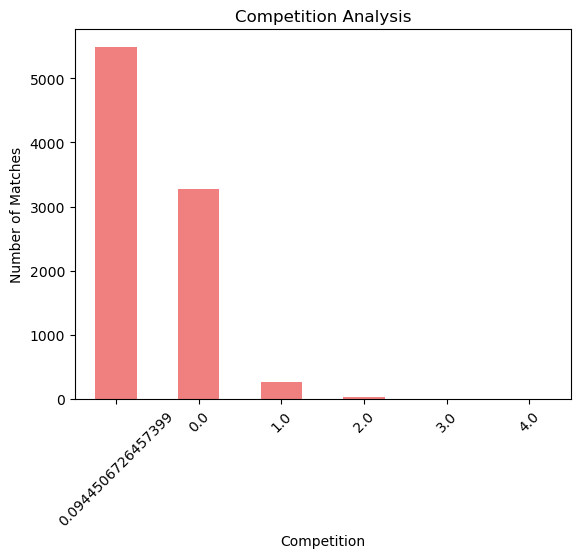

In [14]:
# Assuming 'competition_data.csv' contains the competition data
competition_data = pd.read_csv('Football_data_merged_cleaned.csv')

# Group by competition and count the number of matches played
competition_counts = competition_data['goals'].value_counts()

# Plotting
competition_counts.plot(kind='bar', color='lightcoral')
plt.title('Competition Analysis')
plt.xlabel('Competition')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()



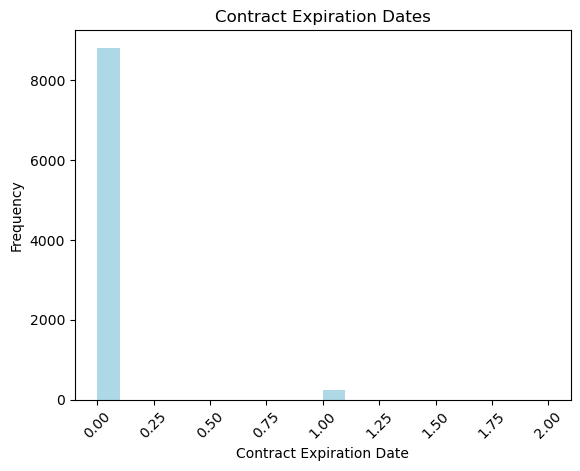

In [18]:

contract_data = pd.read_csv('Football_data_merged_cleaned.csv')

# Plotting contract expiration dates
plt.hist(contract_data['assists'], bins=20, color='lightblue')
plt.title('Contract Expiration Dates')
plt.xlabel('Contract Expiration Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


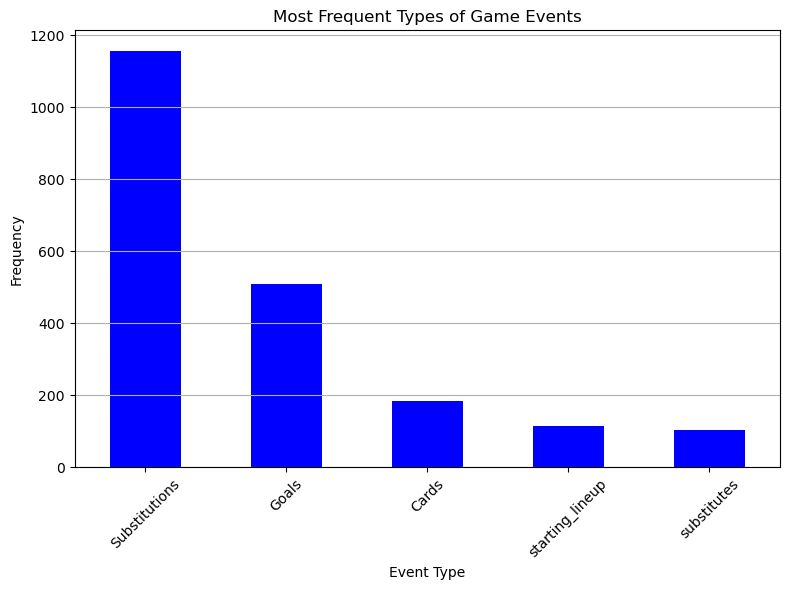

Most frequent types of game events:
type
Substitutions      1156
Goals               509
Cards               184
starting_lineup     116
substitutes         103
Name: count, dtype: int64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Football_data_merged_cleaned.csv')


# Count the occurrences of each event type
event_counts = df['type'].value_counts()

# Visualize the most frequent types of game events
plt.figure(figsize=(8, 6))
event_counts.plot(kind='bar', color='blue')
plt.title('Most Frequent Types of Game Events')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print("Most frequent types of game events:")
print(event_counts)


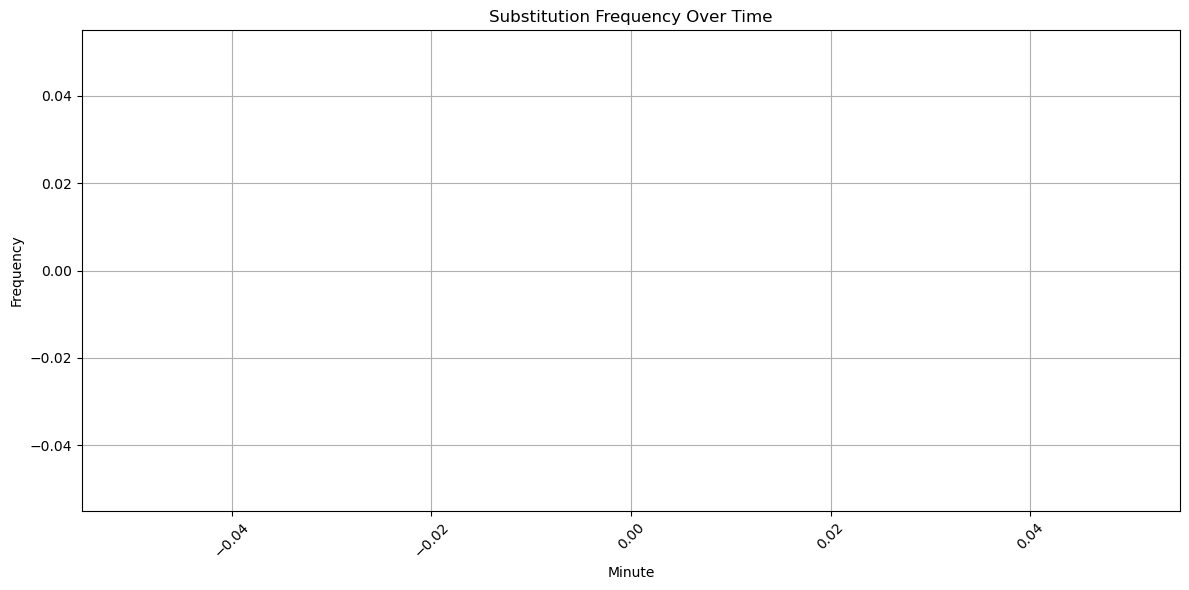

Substitution Frequency by Minute:
Series([], dtype: int64)


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to extract substitution events
substitutions = df[df['type'] == 'substitution']

# Group by minute and count the number of substitutions in each minute
substitution_frequency = substitutions.groupby('minute').size()

# Create a pivot table to summarize substitution frequency by minute
pivot_table = substitutions.pivot_table(index='minute', aggfunc='size')

# Visualize substitution frequency over time
plt.figure(figsize=(12, 6))
substitution_frequency.plot(kind='line', marker='o', linestyle='-')
plt.title('Substitution Frequency Over Time')
plt.xlabel('Minute')
plt.ylabel('Frequency')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display pivot table
print("Substitution Frequency by Minute:")
print(pivot_table)

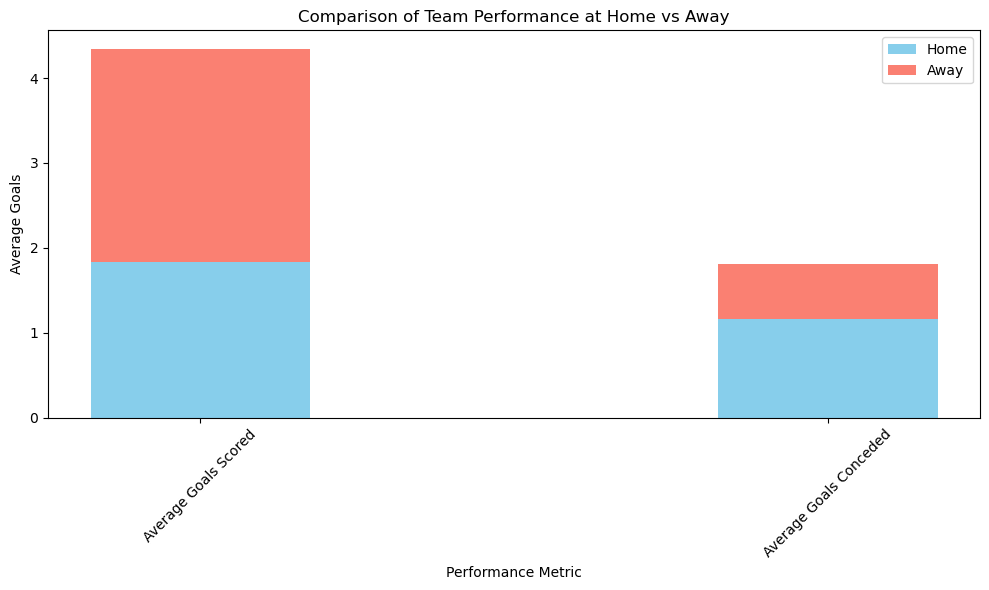

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


home_performance = df[df['home_club_goals'] > df['away_club_goals']]
away_performance = df[df['away_club_goals'] > df['home_club_goals']]

avg_goals_home_scored = home_performance['home_club_goals'].mean()
avg_goals_away_scored = away_performance['away_club_goals'].mean()
avg_goals_home_conceded = home_performance['away_club_goals'].mean()
avg_goals_away_conceded = away_performance['home_club_goals'].mean()

# Visualize the comparison
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = ['Average Goals Scored', 'Average Goals Conceded']
home_data = [avg_goals_home_scored, avg_goals_home_conceded]
away_data = [avg_goals_away_scored, avg_goals_away_conceded]

plt.bar(index, home_data, bar_width, label='Home', color='skyblue')
plt.bar(index, away_data, bar_width, label='Away', color='salmon', bottom=home_data)

plt.xlabel('Performance Metric')
plt.ylabel('Average Goals')
plt.title('Comparison of Team Performance at Home vs Away')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()